In [55]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, v_measure_score, adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import hdbscan

In [56]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

#last column is the target for the following dataset
breast = pd.read_csv('breast_wisc_dataset.csv', header=0)
X_breast_wisc = breast.iloc[:, :-1]
y_breast_wisc = breast.iloc[:, -1]

cybersecurity = pd.read_csv('cybersecurity_data.csv', header=0)
X_cybersecurity = cybersecurity.iloc[:, :-1]
y_cybersecurity = cybersecurity.iloc[:, -1]

aapl = pd.read_csv('HFT_AAPL_data.csv', header=0)
# drop the Date column and first column
aapl = aapl.drop(columns=['Date'])
aapl = aapl.drop(columns=[aapl.columns[0]])
aapl['marketTrend'] = np.where(aapl['marketClose'] > aapl['marketOpen'], 1, np.where(aapl['marketClose'] < aapl['marketOpen'], 0, 2))
X_aapl = aapl.iloc[:, :-1]
y_aapl = aapl.iloc[:, -1]



In [50]:
# basic exploratory data analysis
print("Iris dataset")
# print(iris.feature_names)
print(X_iris.shape)
print(np.unique(y_iris))
print()

print("Breast cancer dataset")
# print(breast.columns)
print(X_breast_wisc.shape)
print(np.unique(y_breast_wisc))
print()

print("Cybersecurity dataset")
# print(cybersecurity.columns)
print(X_cybersecurity.shape)
print(np.unique(y_cybersecurity))
print()

print("HFT AAPL dataset")
# print(aapl.columns)
print(X_aapl.shape)
print(np.unique(y_aapl))
print()
# For the Iris dataset
print("Iris dataset class counts:")
print(pd.Series(y_iris).value_counts())
print()

# For the Breast Cancer dataset
print("Breast Cancer dataset class counts:")
print(y_breast_wisc.value_counts())
print()

# For the Cybersecurity dataset
print("Cybersecurity dataset class counts:")
print(y_cybersecurity.value_counts())
print()

# For the AAPL dataset
print("AAPL dataset class counts:")
print(y_aapl.value_counts())
print()

Iris dataset
(150, 4)
[0 1 2]

Breast cancer dataset
(569, 30)
['Benign' 'Malignant']

Cybersecurity dataset
(510, 41)
[-1  1]

HFT AAPL dataset
(5850, 9)
[0 1 2]

Iris dataset class counts:
0    50
1    50
2    50
dtype: int64

Breast Cancer dataset class counts:
Malignant    357
Benign       212
Name: label, dtype: int64

Cybersecurity dataset class counts:
-1    493
 1     17
Name: class, dtype: int64

AAPL dataset class counts:
0    2909
1    2768
2     173
Name: marketTrend, dtype: int64



In [35]:
def SSScaleData(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

def MMScaleData(X):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X

def RBScaleData(X):
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    return X

def MAScaleData(X):
    scaler = MaxAbsScaler()
    X = scaler.fit_transform(X)
    return X

In [36]:
def do_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    return y_pred

def do_hdbscan(X, min_cluster_size):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    clusterer.fit(X)
    y_pred = clusterer.labels_
    return y_pred

def do_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    y_pred = dbscan.labels_
    return y_pred

def do_optics(X, min_samples, xi):
    optics = OPTICS(min_samples=min_samples, xi=xi)
    optics.fit(X)
    y_pred = optics.labels_
    return y_pred

def do_bisecting_kmeans(X, k):
    Z = linkage(X, 'ward')
    y_pred = fcluster(Z, k, criterion='maxclust')
    return y_pred

In [37]:
X_aapl_scaled_ss = SSScaleData(X_aapl)
X_aapl_scaled_mm = MMScaleData(X_aapl)
X_aapl_scaled_rb = RBScaleData(X_aapl)
X_aapl_scaled_ma = MAScaleData(X_aapl)

X_iris_scaled_ss = SSScaleData(X_iris)
X_iris_scaled_mm = MMScaleData(X_iris)
X_iris_scaled_rb = RBScaleData(X_iris)
X_iris_scaled_ma = MAScaleData(X_iris)

X_breast_wisc_scaled_ss = SSScaleData(X_breast_wisc)
X_breast_wisc_scaled_mm = MMScaleData(X_breast_wisc)
X_breast_wisc_scaled_rb = RBScaleData(X_breast_wisc)
X_breast_wisc_scaled_ma = MAScaleData(X_breast_wisc)

X_cybersecurity_scaled_ss = SSScaleData(X_cybersecurity)
X_cybersecurity_scaled_mm = MMScaleData(X_cybersecurity)
X_cybersecurity_scaled_rb = RBScaleData(X_cybersecurity)
X_cybersecurity_scaled_ma = MAScaleData(X_cybersecurity)



In [52]:
def evaluate_clustering(X, labels_true, labels_pred):
    unique_labels = np.unique(labels_pred)
    if len(unique_labels) > 1:  # Check if there's more than one cluster
        silhouette = silhouette_score(X, labels_pred)
        v_measure = v_measure_score(labels_true, labels_pred)
        ari = adjusted_rand_score(labels_true, labels_pred)
        nmi = normalized_mutual_info_score(labels_true, labels_pred)
        ami = adjusted_mutual_info_score(labels_true, labels_pred)
        return silhouette, v_measure, ari, nmi, ami
    else:
        print("Not enough clusters to evaluate. Found labels:", unique_labels)
        return None, None, None, None, None

In [57]:
iris_data_dict = {}

labels_kmeans_iris_ss = do_kmeans(X_iris_scaled_ss, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_kmeans_iris_ss)
print(f"KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_iris_ss = do_hdbscan(X_iris_scaled_ss, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_hdbscan_iris_ss)
print(f"HDBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['HDBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_iris_ss = do_dbscan(X_iris_scaled_ss, 0.5, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_dbscan_iris_ss)
print(f"DBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['DBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_iris_ss = do_optics(X_iris_scaled_ss, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_optics_iris_ss)
print(f"OPTICS - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['OPTICS_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_iris_ss = do_bisecting_kmeans(X_iris_scaled_ss, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ss, y_iris, labels_bisecting_kmeans_iris_ss)
print(f"Bisecting KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['Bisecting KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_iris_mm = do_kmeans(X_iris_scaled_mm, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_kmeans_iris_mm)
print(f"KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_iris_mm = do_hdbscan(X_iris_scaled_mm, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_hdbscan_iris_mm)
print(f"HDBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['HDBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_iris_mm = do_dbscan(X_iris_scaled_mm, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_dbscan_iris_mm)
print(f"DBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['DBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_iris_mm = do_optics(X_iris_scaled_mm, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_optics_iris_mm)
print(f"OPTICS - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['OPTICS_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_iris_mm = do_bisecting_kmeans(X_iris_scaled_mm, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_mm, y_iris, labels_bisecting_kmeans_iris_mm)
print(f"Bisecting KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['Bisecting KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_iris_rb = do_kmeans(X_iris_scaled_rb, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_kmeans_iris_rb)
print(f"KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_iris_rb = do_hdbscan(X_iris_scaled_rb, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_hdbscan_iris_rb)
print(f"HDBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['HDBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_iris_rb = do_dbscan(X_iris_scaled_rb, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_dbscan_iris_rb)
print(f"DBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['DBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_iris_rb = do_optics(X_iris_scaled_rb, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_optics_iris_rb)
print(f"OPTICS - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['OPTICS_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_iris_rb = do_bisecting_kmeans(X_iris_scaled_rb, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_rb, y_iris, labels_bisecting_kmeans_iris_rb)
print(f"Bisecting KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['Bisecting KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_iris_ma = do_kmeans(X_iris_scaled_ma, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_kmeans_iris_ma)
print(f"KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_iris_ma = do_hdbscan(X_iris_scaled_ma, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_hdbscan_iris_ma)
print(f"HDBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['HDBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_iris_ma = do_dbscan(X_iris_scaled_ma, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_dbscan_iris_ma)
print(f"DBSCAN - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['DBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_iris_ma = do_optics(X_iris_scaled_ma, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_optics_iris_ma)
print(f"OPTICS - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['OPTICS_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_iris_ma = do_bisecting_kmeans(X_iris_scaled_ma, 3)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_iris_scaled_ma, y_iris, labels_bisecting_kmeans_iris_ma)
print(f"Bisecting KMeans - Iris: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
iris_data_dict['Bisecting KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]


KMeans - Iris: Silhouette=0.45994823920518635, V-measure=0.659486892724918, ARI=0.6201351808870379, NMI=0.659486892724918, AMI=0.6552228479234864
HDBSCAN - Iris: Silhouette=0.49486290250095627, V-measure=0.7174643320814477, ARI=0.5637510205230709, NMI=0.7174643320814476, AMI=0.7125764811325077
DBSCAN - Iris: Silhouette=0.15971036873870176, V-measure=0.5168393648274323, ARI=0.4525746356418138, NMI=0.5168393648274324, AMI=0.49325749034137545
OPTICS - Iris: Silhouette=-0.300864934206103, V-measure=0.2923566511548631, ARI=0.05141642728695205, NMI=0.29235665115486303, AMI=0.2656899926556021
Bisecting KMeans - Iris: Silhouette=0.4466890410285909, V-measure=0.6754701853436886, ARI=0.6153229932145449, NMI=0.6754701853436886, AMI=0.6712861348071291
KMeans - Iris: Silhouette=0.5047687565398589, V-measure=0.7419116631817836, ARI=0.7163421126838476, NMI=0.7419116631817836, AMI=0.7386548254402864
HDBSCAN - Iris: Silhouette=0.6300471284354711, V-measure=0.7336804366512104, ARI=0.5681159420289855, NM

In [58]:
breast_data_dict = {}

labels_kmeans_breast_ss = do_kmeans(X_breast_wisc_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_kmeans_breast_ss)
print(f"KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_breast_ss = do_hdbscan(X_breast_wisc_scaled_ss, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_hdbscan_breast_ss)
print(f"HDBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['HDBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_breast_ss = do_dbscan(X_breast_wisc_scaled_ss, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_dbscan_breast_ss)
print(f"DBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['DBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_breast_ss = do_optics(X_breast_wisc_scaled_ss, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_optics_breast_ss)
print(f"OPTICS - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['OPTICS_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_breast_ss = do_bisecting_kmeans(X_breast_wisc_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ss, y_breast_wisc, labels_bisecting_kmeans_breast_ss)
print(f"Bisecting KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['Bisecting KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_breast_mm = do_kmeans(X_breast_wisc_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_kmeans_breast_mm)
print(f"KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_breast_mm = do_hdbscan(X_breast_wisc_scaled_mm, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_hdbscan_breast_mm)
print(f"HDBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['HDBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_breast_mm = do_dbscan(X_breast_wisc_scaled_mm, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_dbscan_breast_mm)
print(f"DBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['DBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_breast_mm = do_optics(X_breast_wisc_scaled_mm, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_optics_breast_mm)
print(f"OPTICS - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['OPTICS_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_breast_mm = do_bisecting_kmeans(X_breast_wisc_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_mm, y_breast_wisc, labels_bisecting_kmeans_breast_mm)
print(f"Bisecting KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['Bisecting KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_breast_rb = do_kmeans(X_breast_wisc_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_kmeans_breast_rb)
print(f"KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_breast_rb = do_hdbscan(X_breast_wisc_scaled_rb, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_hdbscan_breast_rb)
print(f"HDBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['HDBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_breast_rb = do_dbscan(X_breast_wisc_scaled_rb, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_dbscan_breast_rb)
print(f"DBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['DBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_breast_rb = do_optics(X_breast_wisc_scaled_rb, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_optics_breast_rb)
print(f"OPTICS - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['OPTICS_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_breast_rb = do_bisecting_kmeans(X_breast_wisc_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_rb, y_breast_wisc, labels_bisecting_kmeans_breast_rb)
print(f"Bisecting KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['Bisecting KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_breast_ma = do_kmeans(X_breast_wisc_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_kmeans_breast_ma)
print(f"KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_breast_ma = do_hdbscan(X_breast_wisc_scaled_ma, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_hdbscan_breast_ma)
print(f"HDBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['HDBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_breast_ma = do_dbscan(X_breast_wisc_scaled_ma, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_dbscan_breast_ma)
print(f"DBSCAN - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['DBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_breast_ma = do_optics(X_breast_wisc_scaled_ma, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_optics_breast_ma)
print(f"OPTICS - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['OPTICS_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_breast_ma = do_bisecting_kmeans(X_breast_wisc_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_breast_wisc_scaled_ma, y_breast_wisc, labels_bisecting_kmeans_breast_ma)
print(f"Bisecting KMeans - Breast: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
breast_data_dict['Bisecting KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

KMeans - Breast: Silhouette=0.34338224069077805, V-measure=0.5324078598532422, ARI=0.6536246043910179, NMI=0.5324078598532422, AMI=0.5317737219826534
HDBSCAN - Breast: Silhouette=-0.047852671039569424, V-measure=0.19899510374253104, ARI=0.11855419155787604, NMI=0.19899510374253104, AMI=0.19688538402761704
Not enough clusters to evaluate. Found labels: [-1]
DBSCAN - Breast: Silhouette=None, V-measure=None, ARI=None, NMI=None, AMI=None
OPTICS - Breast: Silhouette=-0.0956040536590282, V-measure=0.05136362301784874, ARI=0.02766435305873905, NMI=0.05136362301784875, AMI=0.049012400828399375
Bisecting KMeans - Breast: Silhouette=0.33938477753669855, V-measure=0.4569149200498728, ARI=0.5750409366326297, NMI=0.45691492004987283, AMI=0.4561712931139445
KMeans - Breast: Silhouette=0.3845494883485513, V-measure=0.6230860242027794, ARI=0.7301749027614344, NMI=0.6230860242027795, AMI=0.6225724776699424
HDBSCAN - Breast: Silhouette=0.03245235755241687, V-measure=0.25121619875393736, ARI=0.2508404124

In [59]:
cybersecurity_data_dict = {}

labels_kmeans_cybersecurity_ss = do_kmeans(X_cybersecurity_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_kmeans_cybersecurity_ss)
print(f"KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_cybersecurity_ss = do_hdbscan(X_cybersecurity_scaled_ss, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_hdbscan_cybersecurity_ss)
print(f"HDBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['HDBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_cybersecurity_ss = do_dbscan(X_cybersecurity_scaled_ss, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_dbscan_cybersecurity_ss)
print(f"DBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['DBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_cybersecurity_ss = do_optics(X_cybersecurity_scaled_ss, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_optics_cybersecurity_ss)
print(f"OPTICS - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['OPTICS_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_cybersecurity_ss = do_bisecting_kmeans(X_cybersecurity_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ss, y_cybersecurity, labels_bisecting_kmeans_cybersecurity_ss)
print(f"Bisecting KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['Bisecting KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_cybersecurity_mm = do_kmeans(X_cybersecurity_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_kmeans_cybersecurity_mm)
print(f"KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_cybersecurity_mm = do_hdbscan(X_cybersecurity_scaled_mm, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_hdbscan_cybersecurity_mm)
print(f"HDBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['HDBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_cybersecurity_mm = do_dbscan(X_cybersecurity_scaled_mm, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_dbscan_cybersecurity_mm)
print(f"DBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['DBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_cybersecurity_mm = do_optics(X_cybersecurity_scaled_mm, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_optics_cybersecurity_mm)
print(f"OPTICS - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['OPTICS_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_cybersecurity_mm = do_bisecting_kmeans(X_cybersecurity_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_mm, y_cybersecurity, labels_bisecting_kmeans_cybersecurity_mm)
print(f"Bisecting KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['Bisecting KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_cybersecurity_rb = do_kmeans(X_cybersecurity_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_kmeans_cybersecurity_rb)
print(f"KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_cybersecurity_rb = do_hdbscan(X_cybersecurity_scaled_rb, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_hdbscan_cybersecurity_rb)
print(f"HDBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['HDBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_cybersecurity_rb = do_dbscan(X_cybersecurity_scaled_rb, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_dbscan_cybersecurity_rb)
print(f"DBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['DBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_cybersecurity_rb = do_optics(X_cybersecurity_scaled_rb, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_optics_cybersecurity_rb)
print(f"OPTICS - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['OPTICS_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_cybersecurity_rb = do_bisecting_kmeans(X_cybersecurity_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_rb, y_cybersecurity, labels_bisecting_kmeans_cybersecurity_rb)
print(f"Bisecting KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['Bisecting KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_cybersecurity_ma = do_kmeans(X_cybersecurity_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_kmeans_cybersecurity_ma)
print(f"KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_cybersecurity_ma = do_hdbscan(X_cybersecurity_scaled_ma, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_hdbscan_cybersecurity_ma)
print(f"HDBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['HDBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_cybersecurity_ma = do_dbscan(X_cybersecurity_scaled_ma, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_dbscan_cybersecurity_ma)
print(f"DBSCAN - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['DBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_cybersecurity_ma = do_optics(X_cybersecurity_scaled_ma, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_optics_cybersecurity_ma)
print(f"OPTICS - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['OPTICS_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_cybersecurity_ma = do_bisecting_kmeans(X_cybersecurity_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_cybersecurity_scaled_ma, y_cybersecurity, labels_bisecting_kmeans_cybersecurity_ma)
print(f"Bisecting KMeans - Cybersecurity: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
cybersecurity_data_dict['Bisecting KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

KMeans - Cybersecurity: Silhouette=0.36880311644677655, V-measure=0.04828531952311552, ARI=0.10892228965242054, NMI=0.04828531952311551, AMI=0.04494870903810518
HDBSCAN - Cybersecurity: Silhouette=0.4052320336110424, V-measure=0.0600217407888711, ARI=-0.0020362306540487804, NMI=0.06002174078887109, AMI=0.04570107458966869
DBSCAN - Cybersecurity: Silhouette=-0.02173099826981661, V-measure=0.01762159104372252, ARI=-0.046486687946188085, NMI=0.01762159104372252, AMI=0.001222600333807796
OPTICS - Cybersecurity: Silhouette=0.19911699539283256, V-measure=0.05304008957427311, ARI=-0.0050578223203026264, NMI=0.0530400895742731, AMI=0.0345166160593443
Bisecting KMeans - Cybersecurity: Silhouette=0.3810439339941886, V-measure=0.07725057757991001, ARI=0.16930721934402113, NMI=0.07725057757991002, AMI=0.07338669881295742
KMeans - Cybersecurity: Silhouette=0.37556431543806773, V-measure=0.005919479326807695, ARI=0.009794302757167622, NMI=0.005919479326807695, AMI=0.0034541183681803976
HDBSCAN - Cyb

In [60]:
aapl_data_dict = {}

labels_kmeans_aapl_ss = do_kmeans(X_aapl_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_kmeans_aapl_ss)
print(f"KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_aapl_ss = do_hdbscan(X_aapl_scaled_ss, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_hdbscan_aapl_ss)
print(f"HDBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['HDBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_aapl_ss = do_dbscan(X_aapl_scaled_ss, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_dbscan_aapl_ss)
print(f"DBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['DBSCAN_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_aapl_ss = do_optics(X_aapl_scaled_ss, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_optics_aapl_ss)
print(f"OPTICS - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['OPTICS_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_aapl_ss = do_bisecting_kmeans(X_aapl_scaled_ss, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ss, y_aapl, labels_bisecting_kmeans_aapl_ss)
print(f"Bisecting KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['Bisecting KMeans_ss'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_aapl_mm = do_kmeans(X_aapl_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_kmeans_aapl_mm)
print(f"KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_aapl_mm = do_hdbscan(X_aapl_scaled_mm, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_hdbscan_aapl_mm)
print(f"HDBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['HDBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_aapl_mm = do_dbscan(X_aapl_scaled_mm, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_dbscan_aapl_mm)
print(f"DBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['DBSCAN_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_aapl_mm = do_optics(X_aapl_scaled_mm, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_optics_aapl_mm)
print(f"OPTICS - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['OPTICS_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_aapl_mm = do_bisecting_kmeans(X_aapl_scaled_mm, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_mm, y_aapl, labels_bisecting_kmeans_aapl_mm)
print(f"Bisecting KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['Bisecting KMeans_mm'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_aapl_rb = do_kmeans(X_aapl_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_kmeans_aapl_rb)
print(f"KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_aapl_rb = do_hdbscan(X_aapl_scaled_rb, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_hdbscan_aapl_rb)
print(f"HDBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['HDBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_aapl_rb = do_dbscan(X_aapl_scaled_rb, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_dbscan_aapl_rb)
print(f"DBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['DBSCAN_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_aapl_rb = do_optics(X_aapl_scaled_rb, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_optics_aapl_rb)
print(f"OPTICS - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['OPTICS_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_aapl_rb = do_bisecting_kmeans(X_aapl_scaled_rb, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_rb, y_aapl, labels_bisecting_kmeans_aapl_rb)
print(f"Bisecting KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['Bisecting KMeans_rb'] = [silhouette, v_measure, ari, nmi, ami]

labels_kmeans_aapl_ma = do_kmeans(X_aapl_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_kmeans_aapl_ma)
print(f"KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_hdbscan_aapl_ma = do_hdbscan(X_aapl_scaled_ma, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_hdbscan_aapl_ma)
print(f"HDBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['HDBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_dbscan_aapl_ma = do_dbscan(X_aapl_scaled_ma, 0.5, 5)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_dbscan_aapl_ma)
print(f"DBSCAN - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['DBSCAN_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_optics_aapl_ma = do_optics(X_aapl_scaled_ma, 5, 0.05)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_optics_aapl_ma)
print(f"OPTICS - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['OPTICS_ma'] = [silhouette, v_measure, ari, nmi, ami]

labels_bisecting_kmeans_aapl_ma = do_bisecting_kmeans(X_aapl_scaled_ma, 2)
silhouette, v_measure, ari, nmi, ami = evaluate_clustering(X_aapl_scaled_ma, y_aapl, labels_bisecting_kmeans_aapl_ma)
print(f"Bisecting KMeans - AAPL: Silhouette={silhouette}, V-measure={v_measure}, ARI={ari}, NMI={nmi}, AMI={ami}")
aapl_data_dict['Bisecting KMeans_ma'] = [silhouette, v_measure, ari, nmi, ami]

KMeans - AAPL: Silhouette=0.3557842470753028, V-measure=2.113394336010827e-05, ARI=0.0004632725999526263, NMI=2.1133943360108267e-05, AMI=-0.00022019806751550781
HDBSCAN - AAPL: Silhouette=-0.002793218950994054, V-measure=0.02083880885693555, ARI=0.0013947890458128863, NMI=0.020838808856935554, AMI=0.01585362075366335
DBSCAN - AAPL: Silhouette=0.1619331512642084, V-measure=0.017803238978945243, ARI=-0.001061103404556755, NMI=0.017803238978945243, AMI=0.016642894875932727
OPTICS - AAPL: Silhouette=-0.4722218858977059, V-measure=0.03203650757870791, ARI=-0.0006752277463547632, NMI=0.03203650757870791, AMI=0.008999906619958666
Bisecting KMeans - AAPL: Silhouette=0.4024023845004971, V-measure=0.00029519728197674905, ARI=-0.0014530353544770487, NMI=0.00029519728197674905, AMI=3.1814888345686106e-05
KMeans - AAPL: Silhouette=0.384575737890303, V-measure=2.06907825919628e-05, ARI=0.00030505109393324874, NMI=2.06907825919628e-05, AMI=-0.00021450258027753258
HDBSCAN - AAPL: Silhouette=0.0760662

In [61]:
# plot the results by cluster method and dataset and normalization type
data = [iris_data_dict, breast_data_dict, cybersecurity_data_dict, aapl_data_dict]
datasets = ['Iris', 'Breast', 'Cybersecurity', 'AAPL']



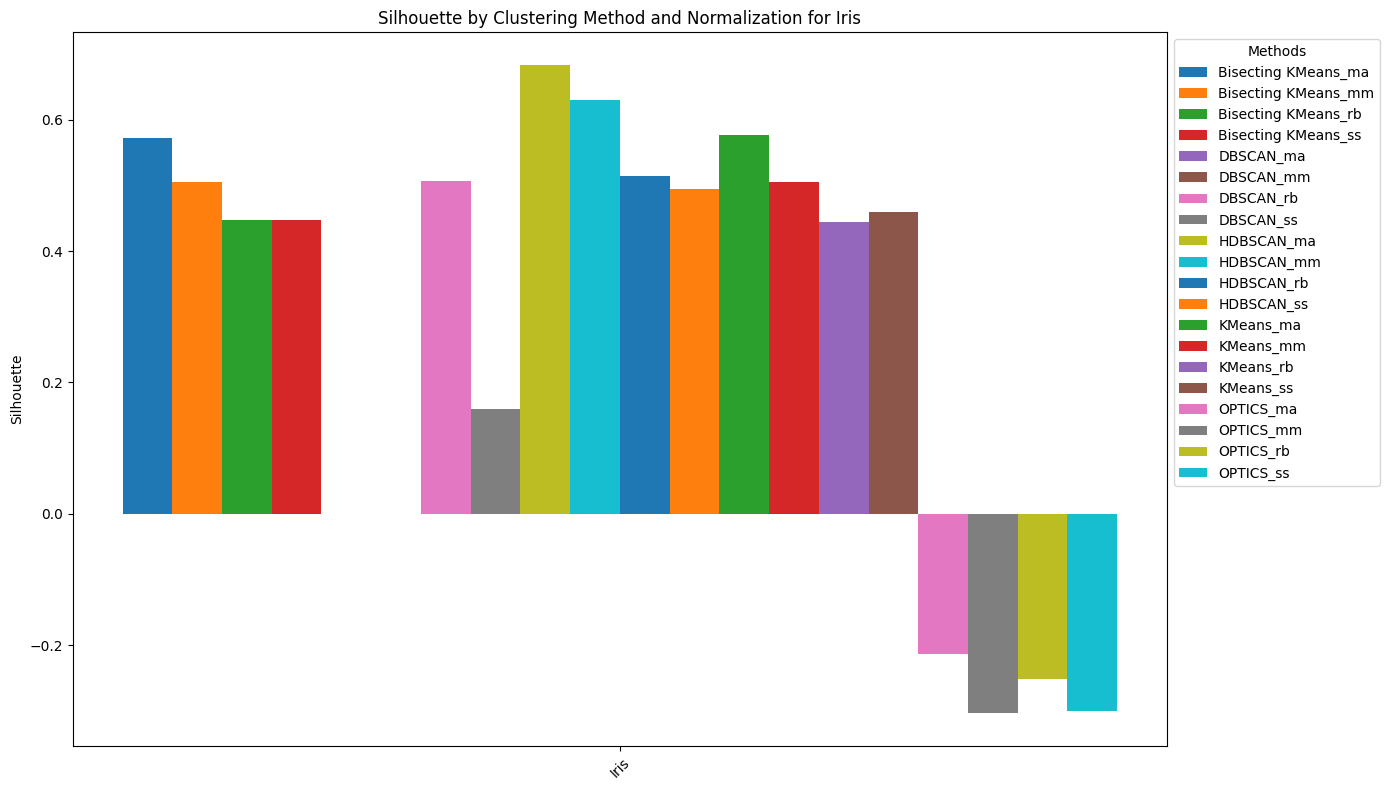

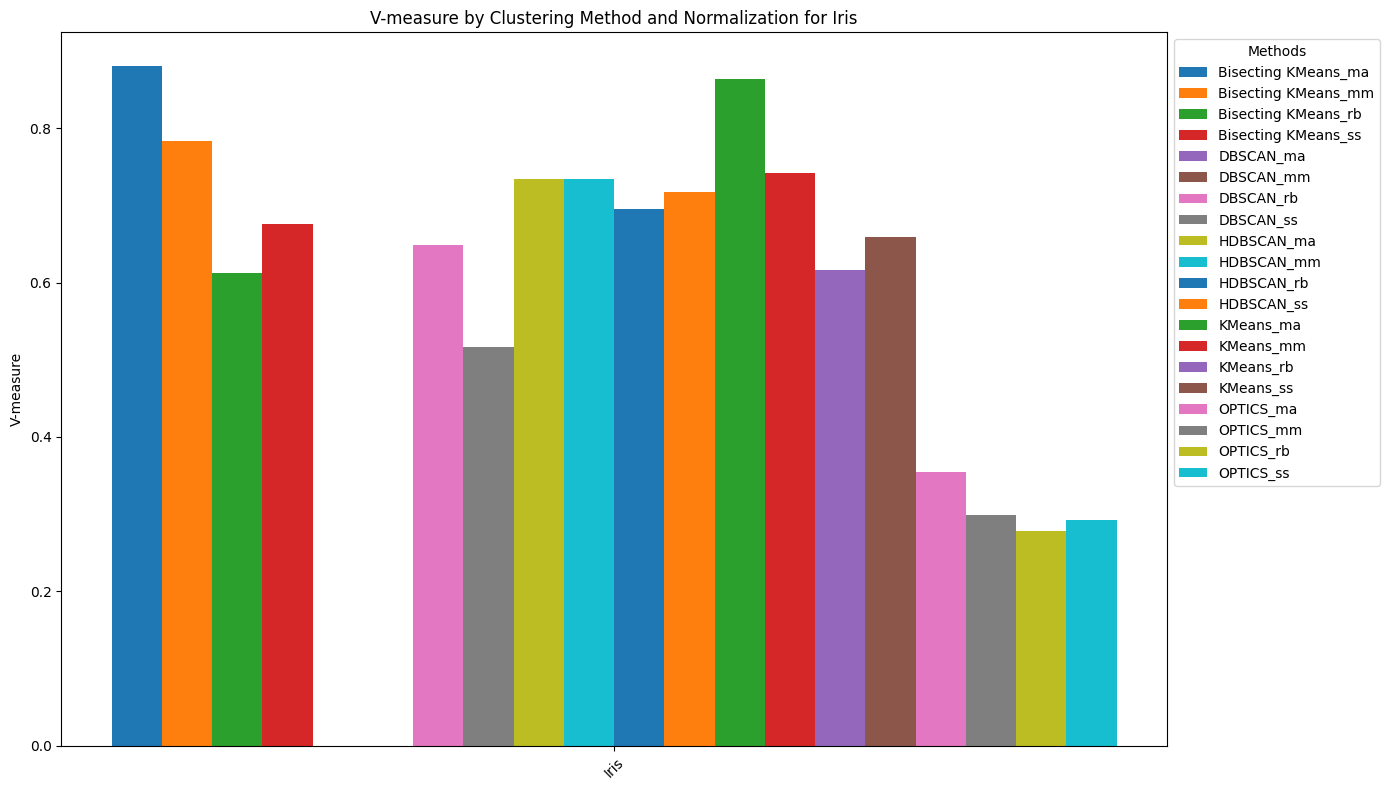

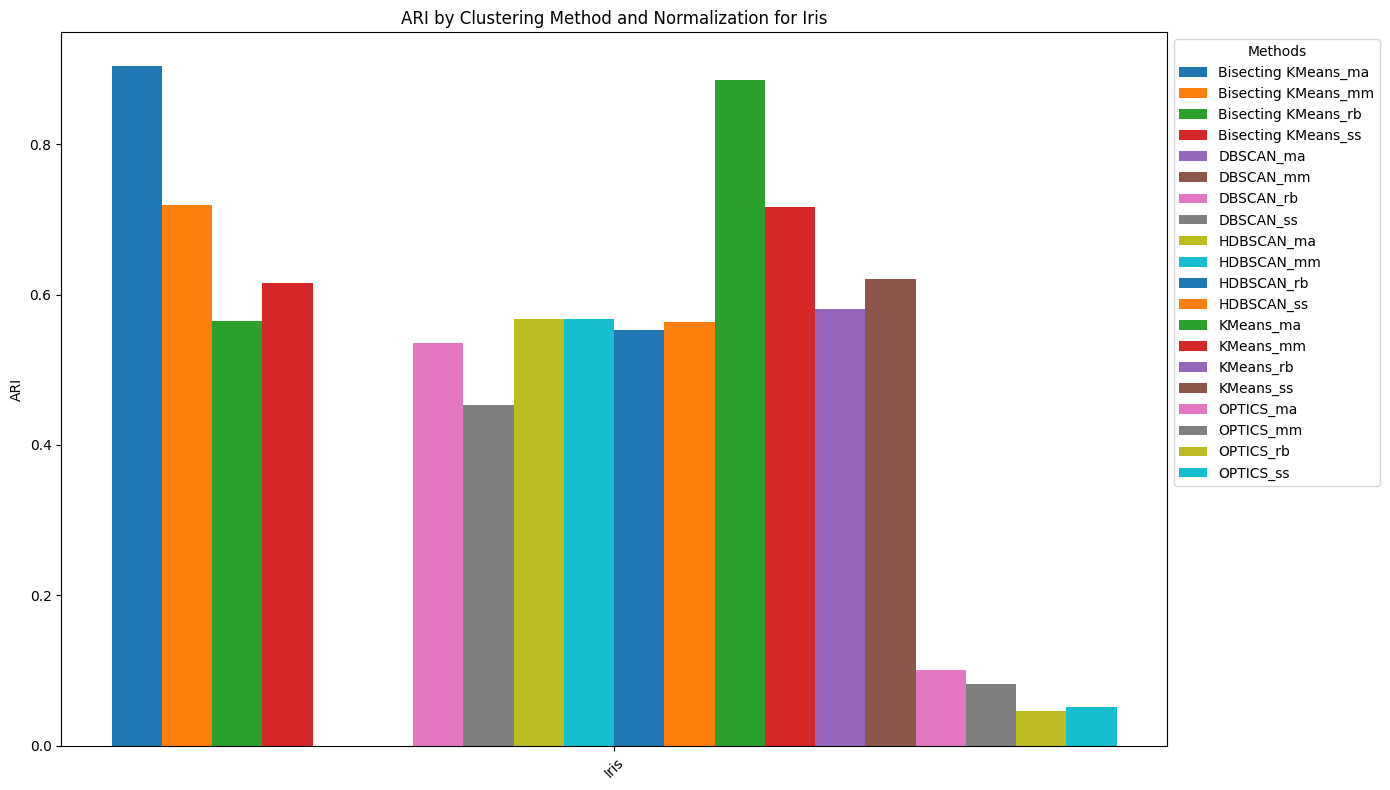

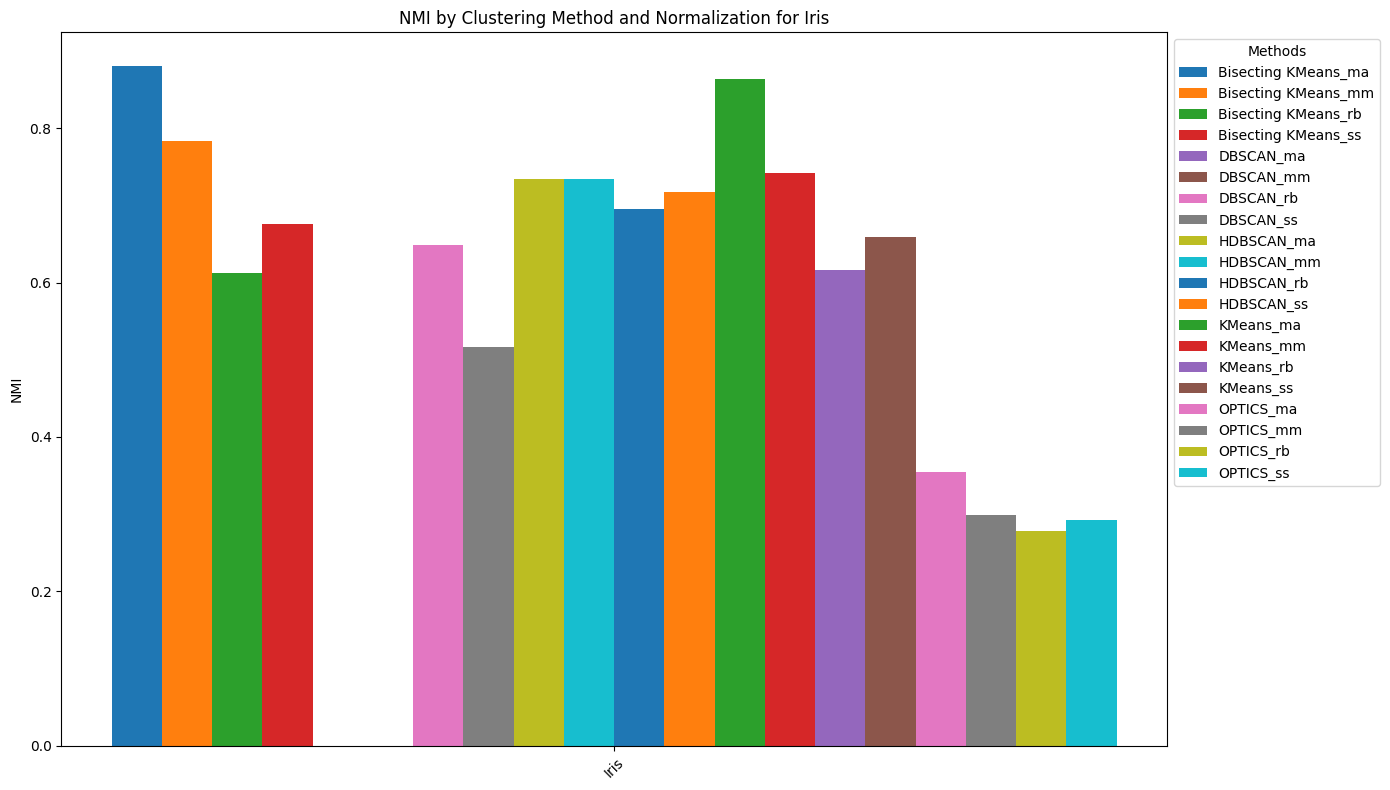

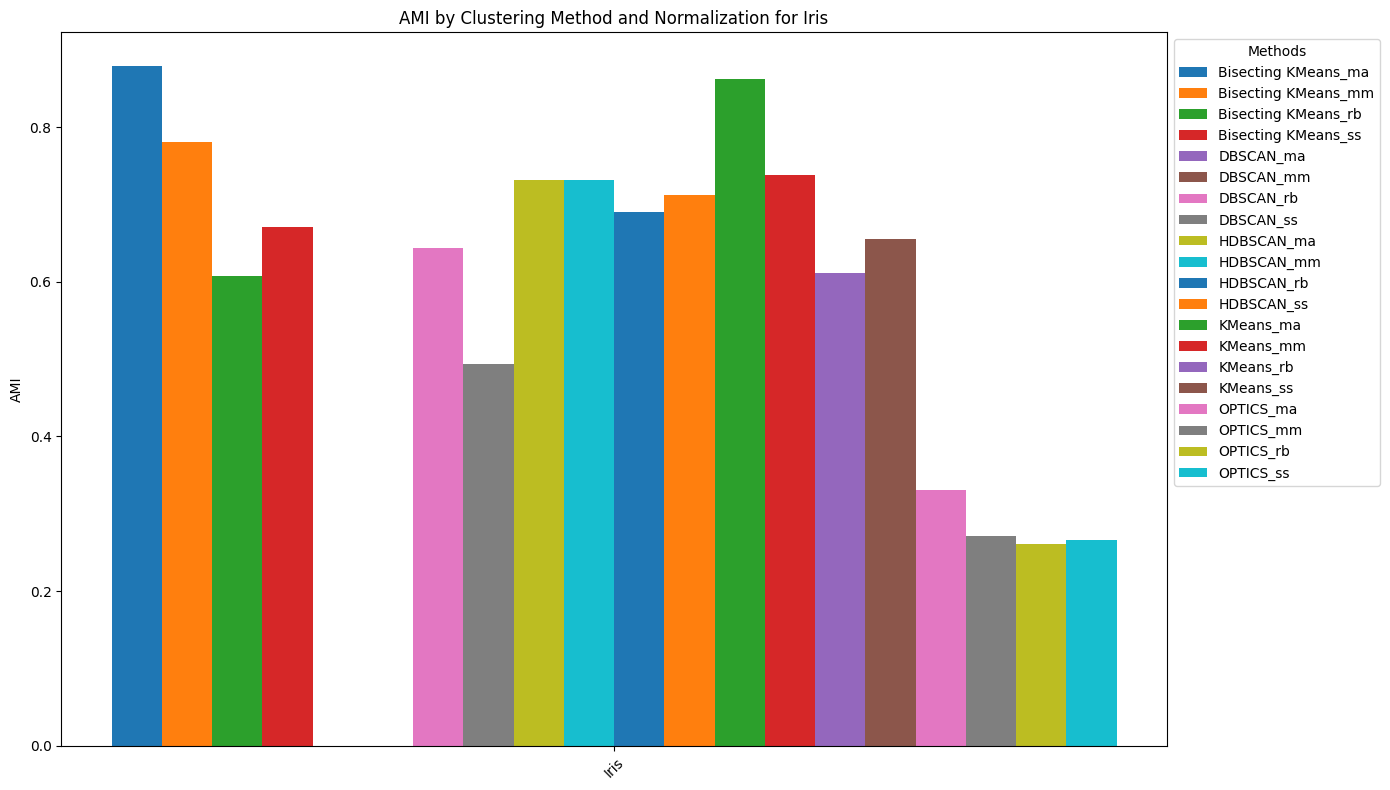

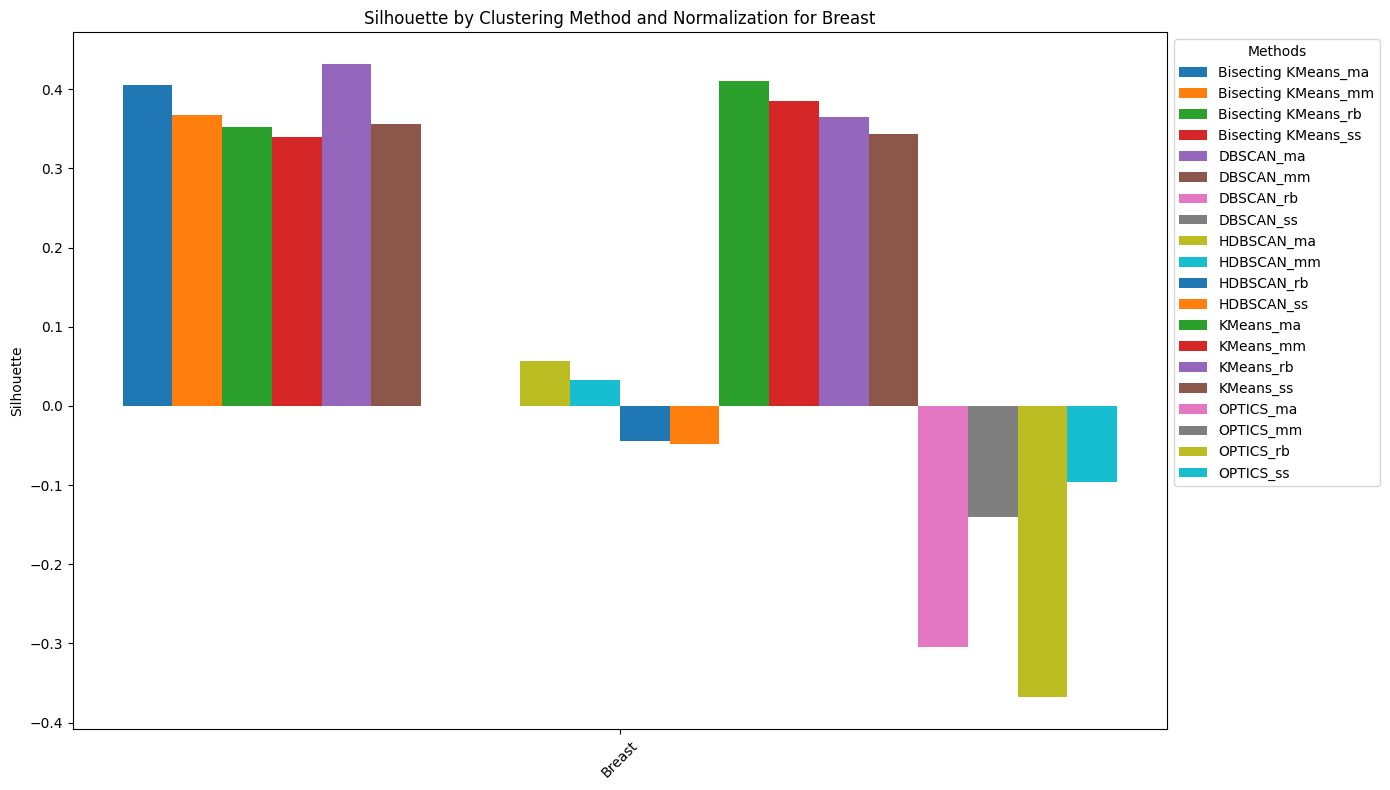

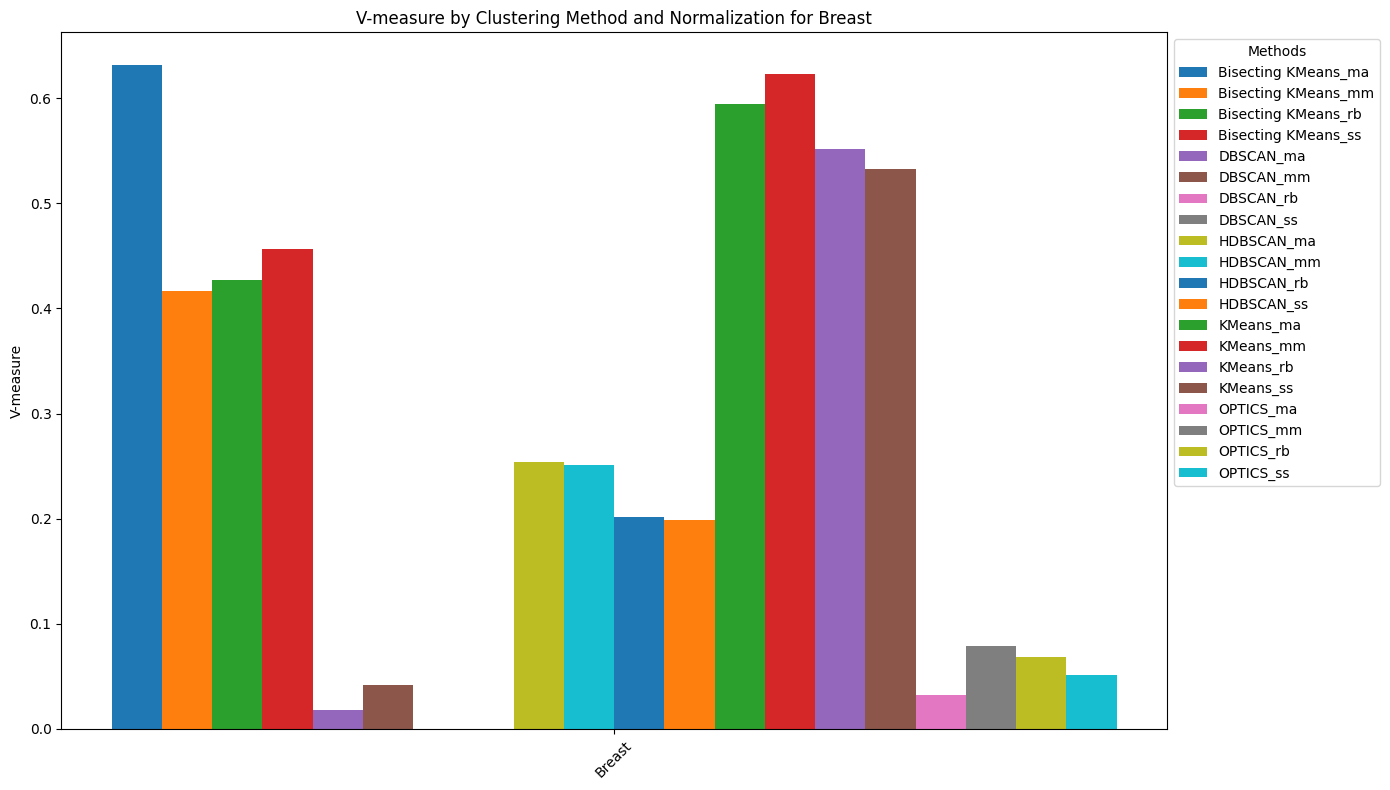

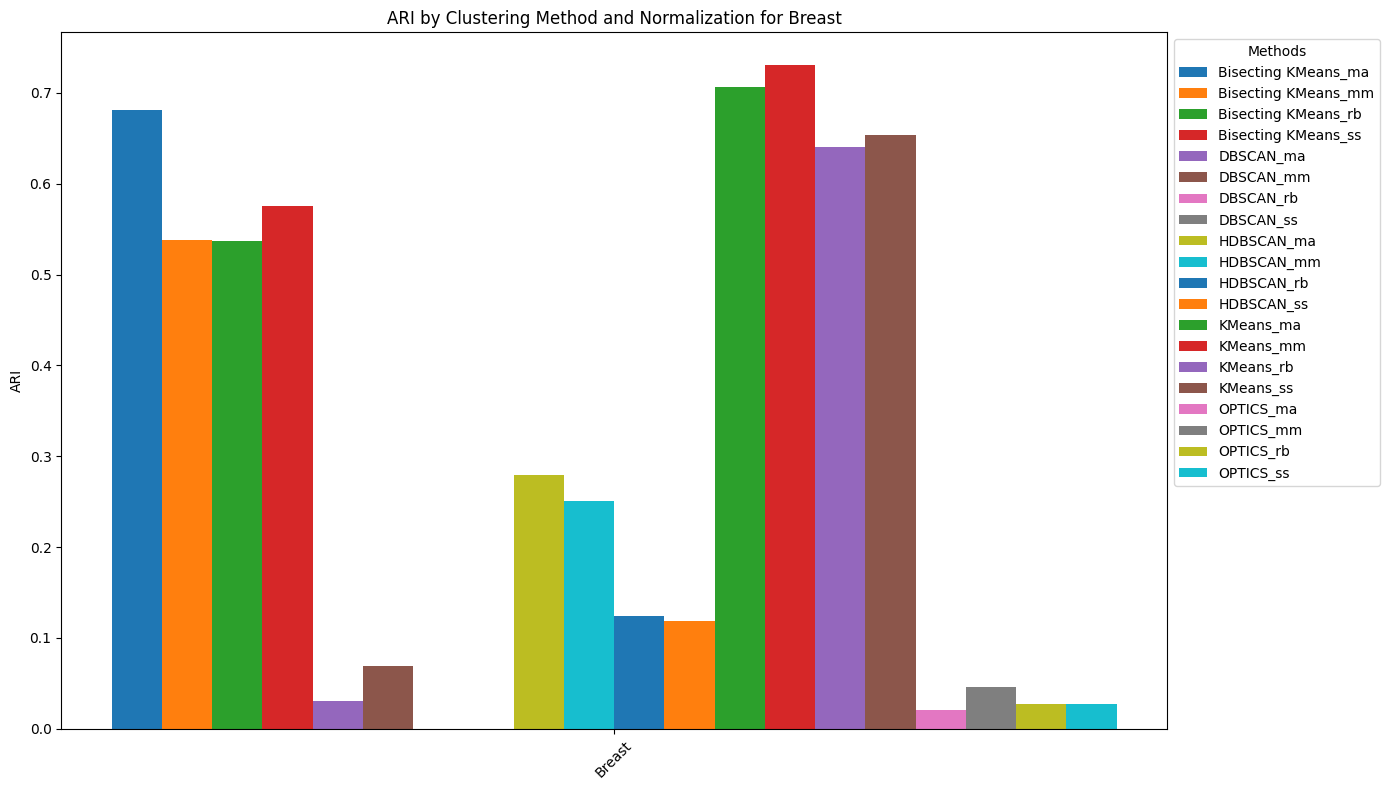

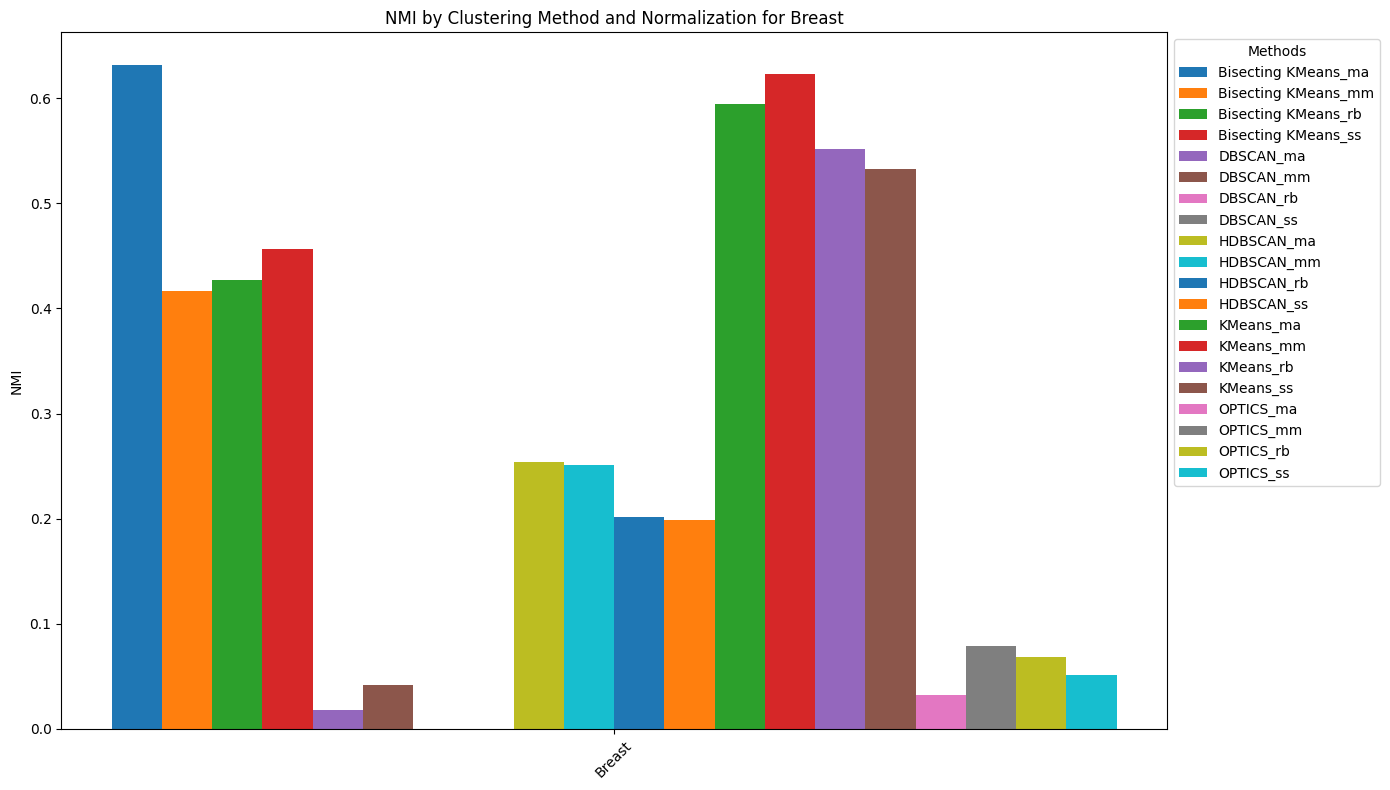

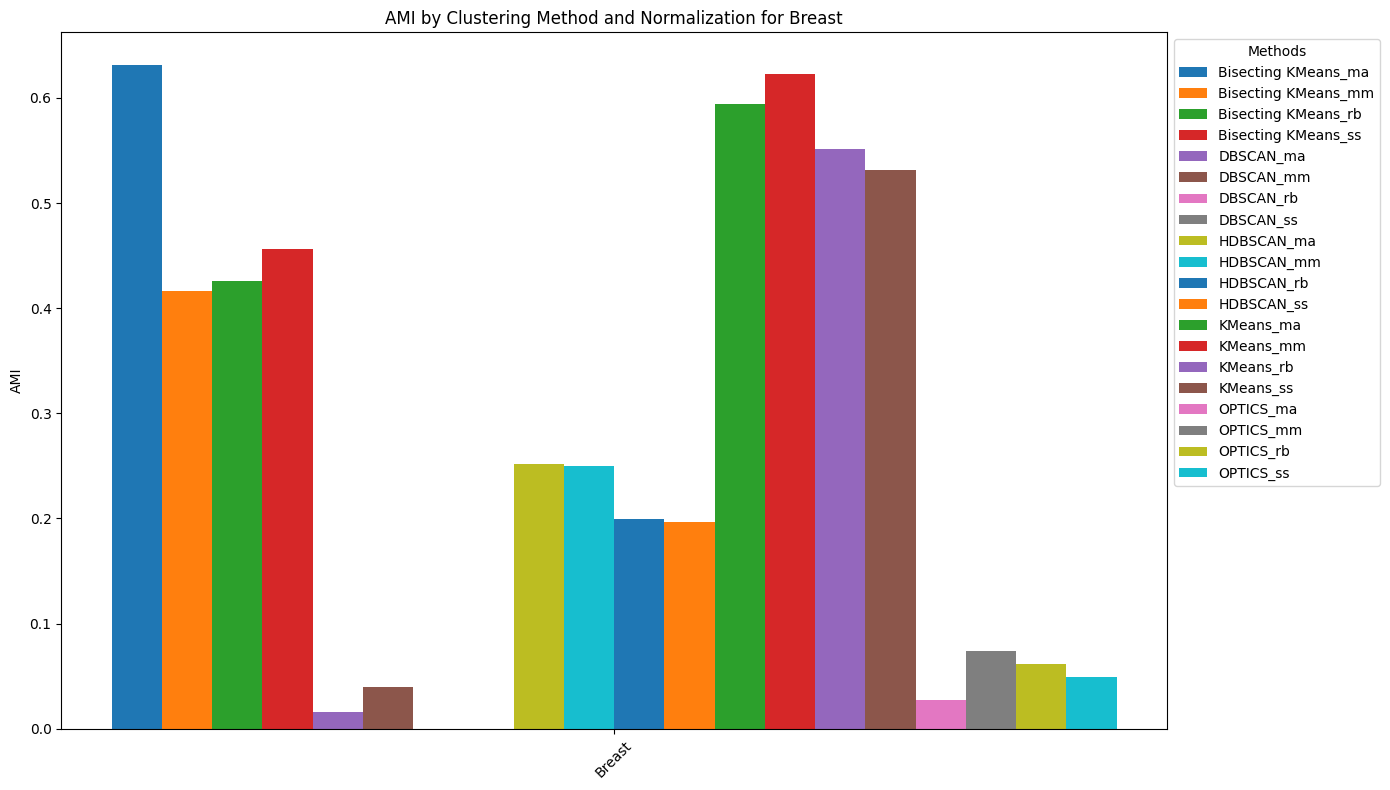

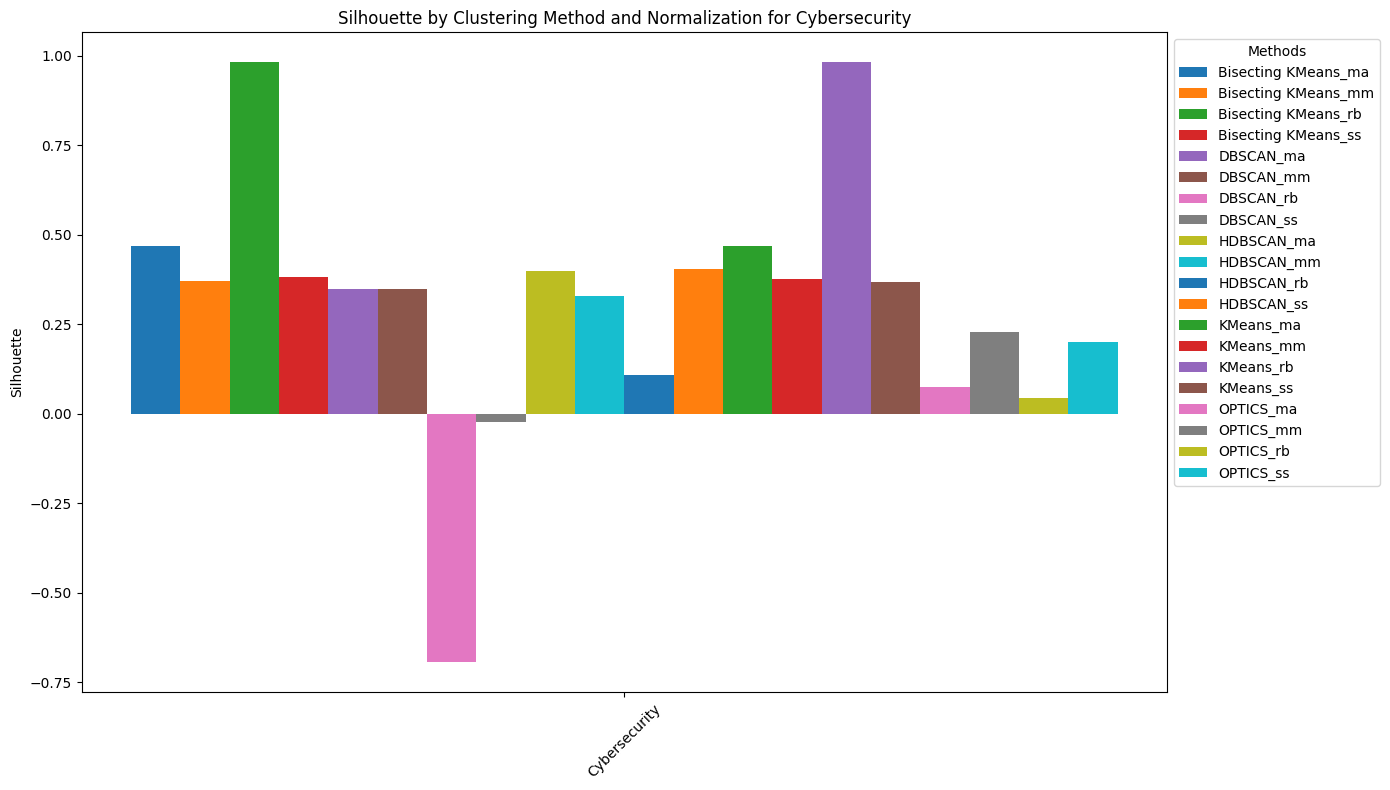

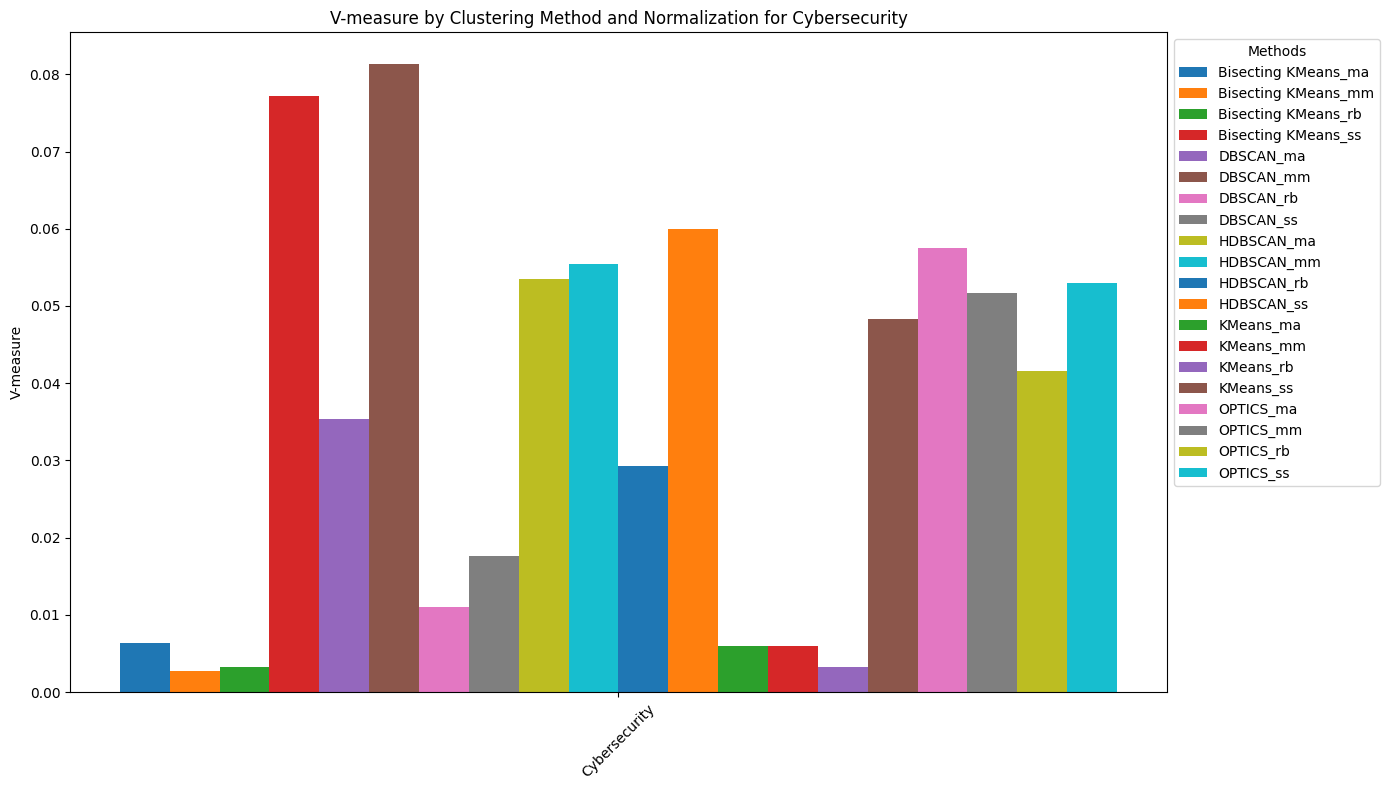

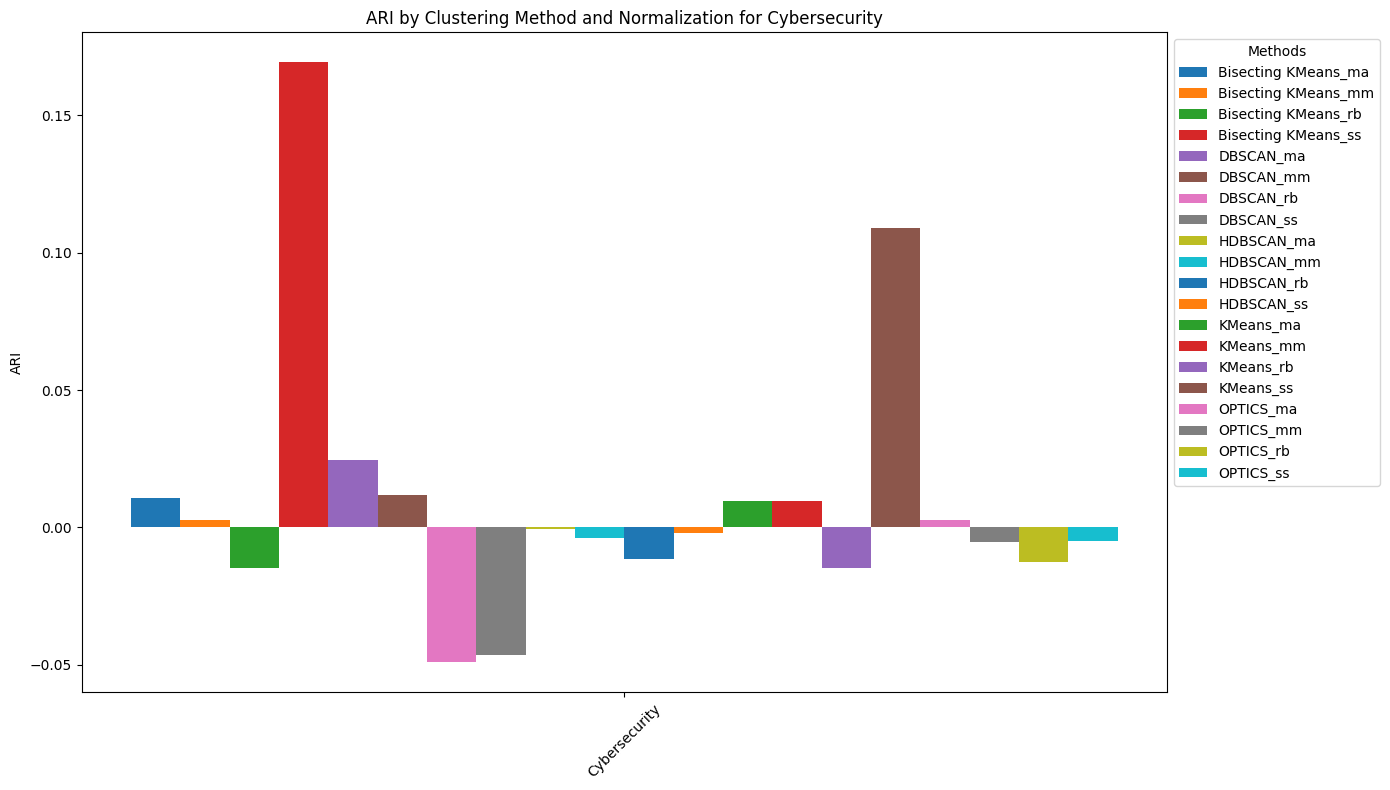

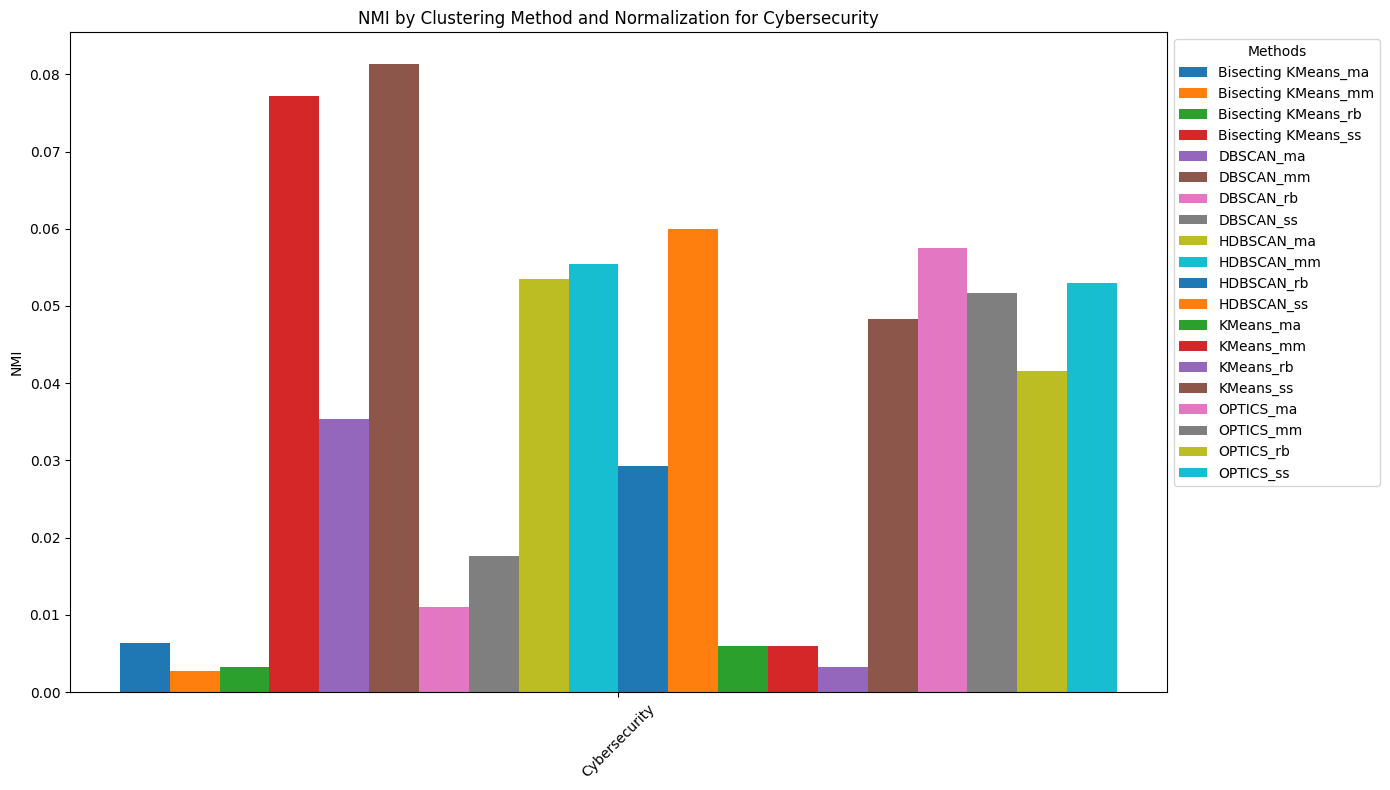

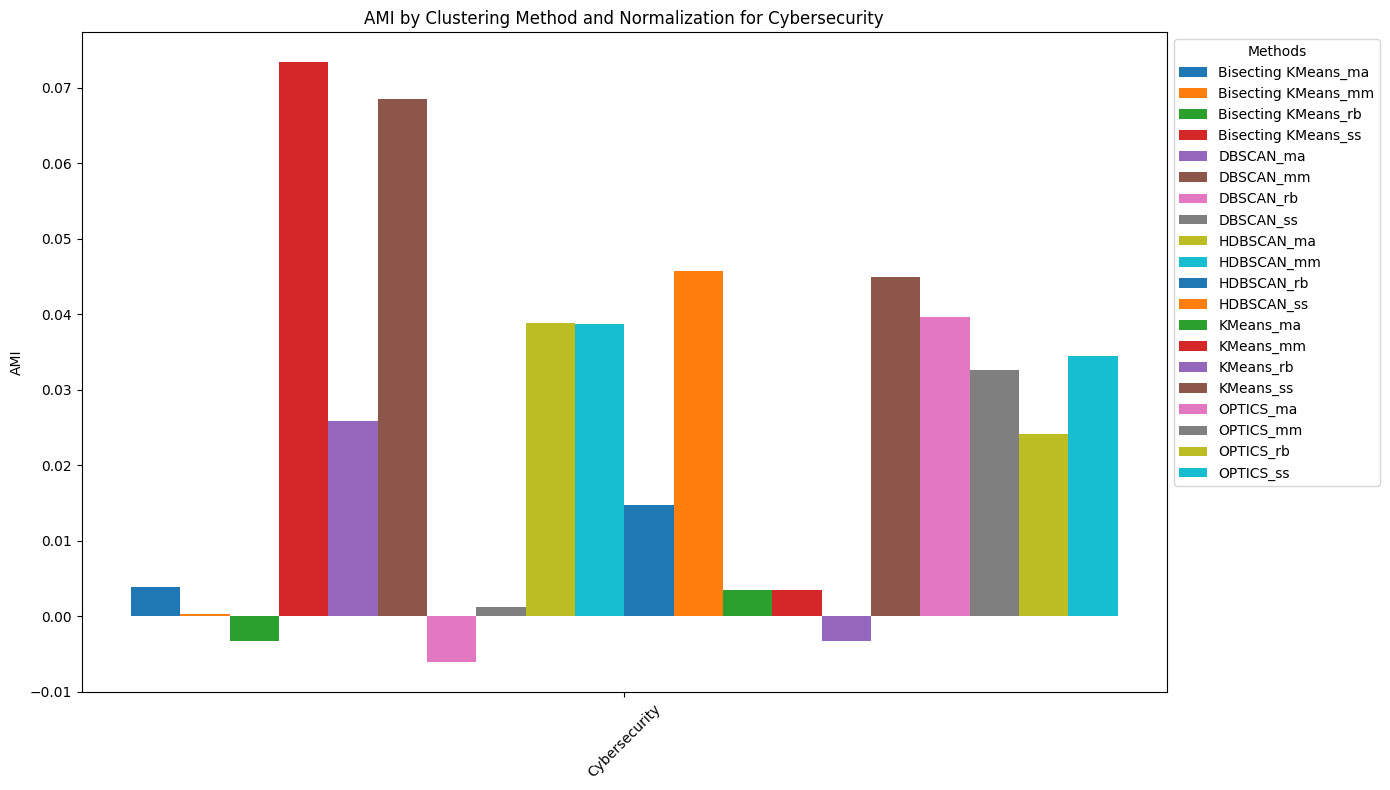

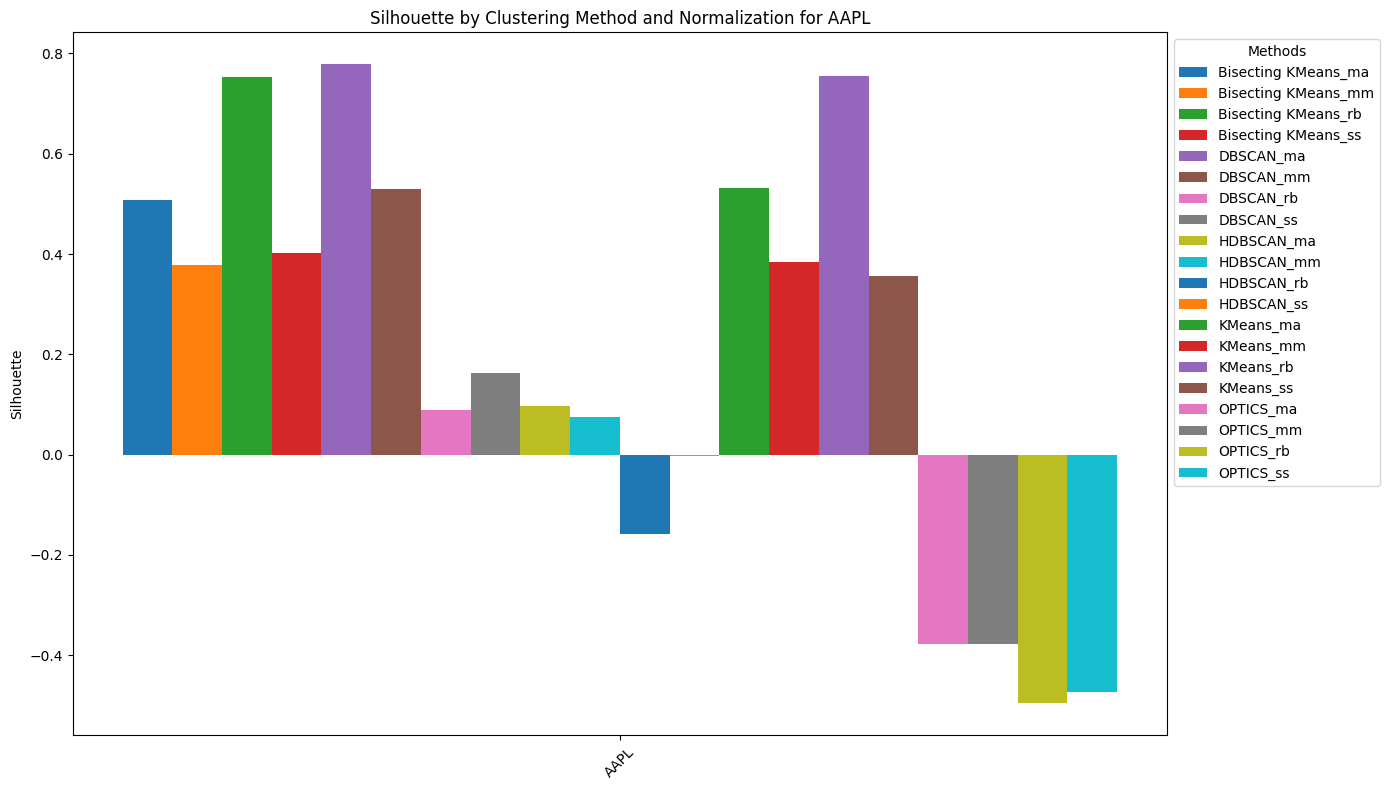

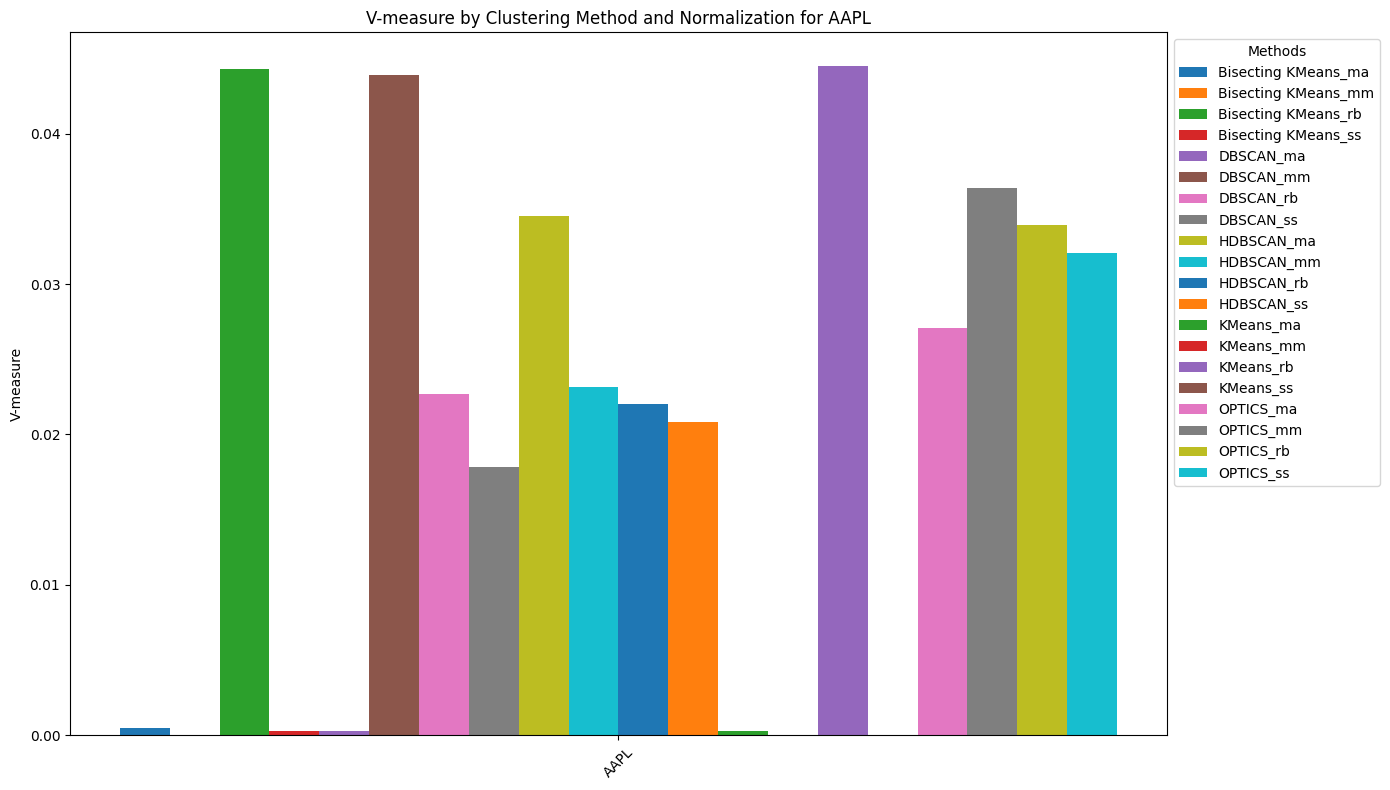

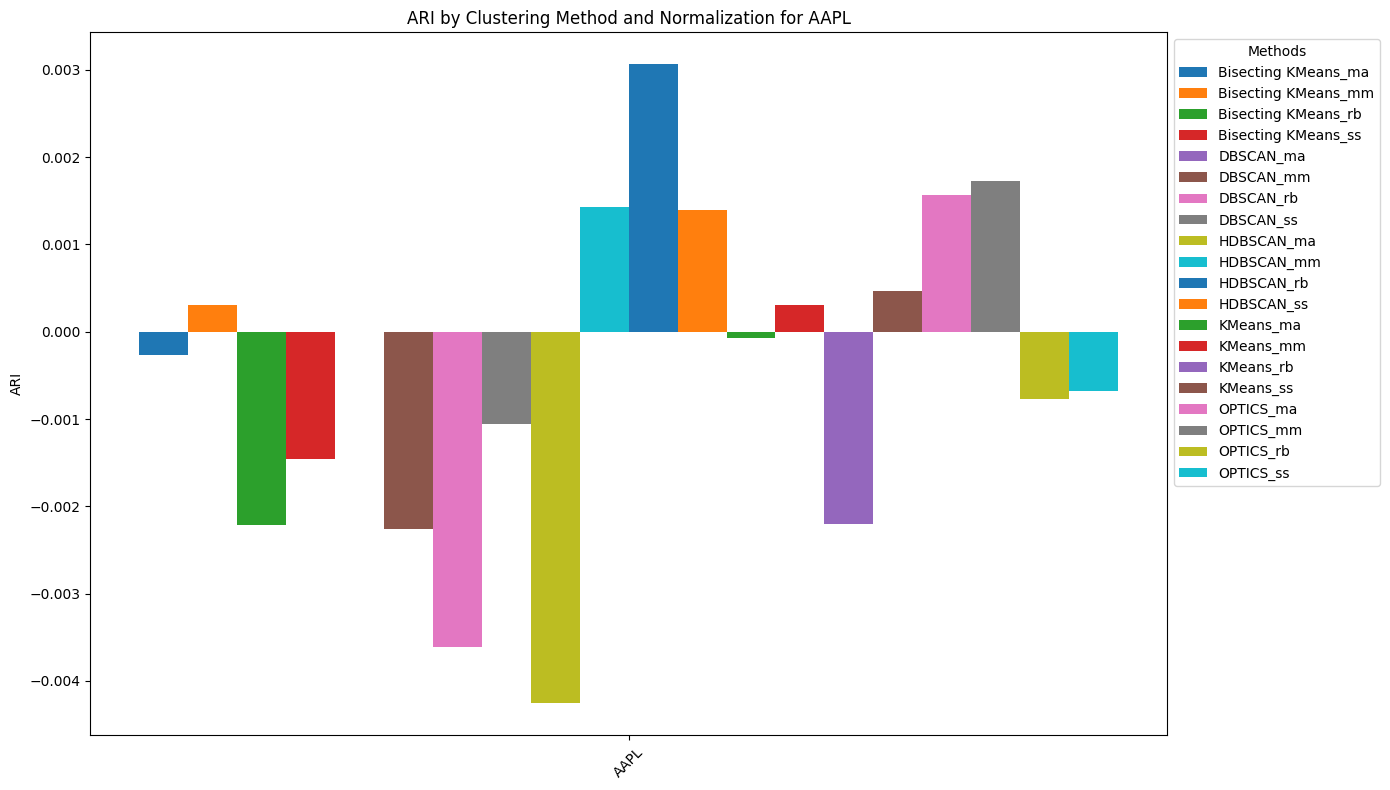

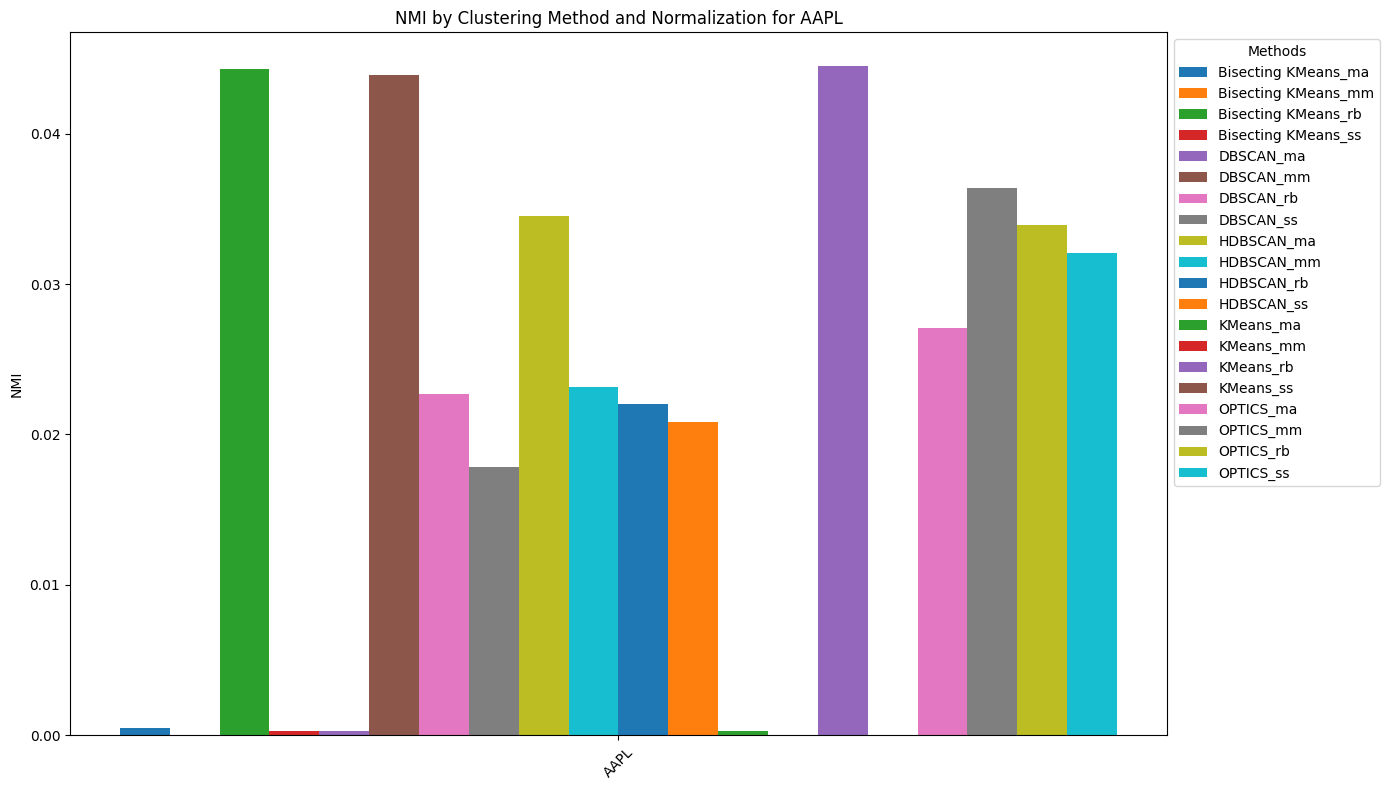

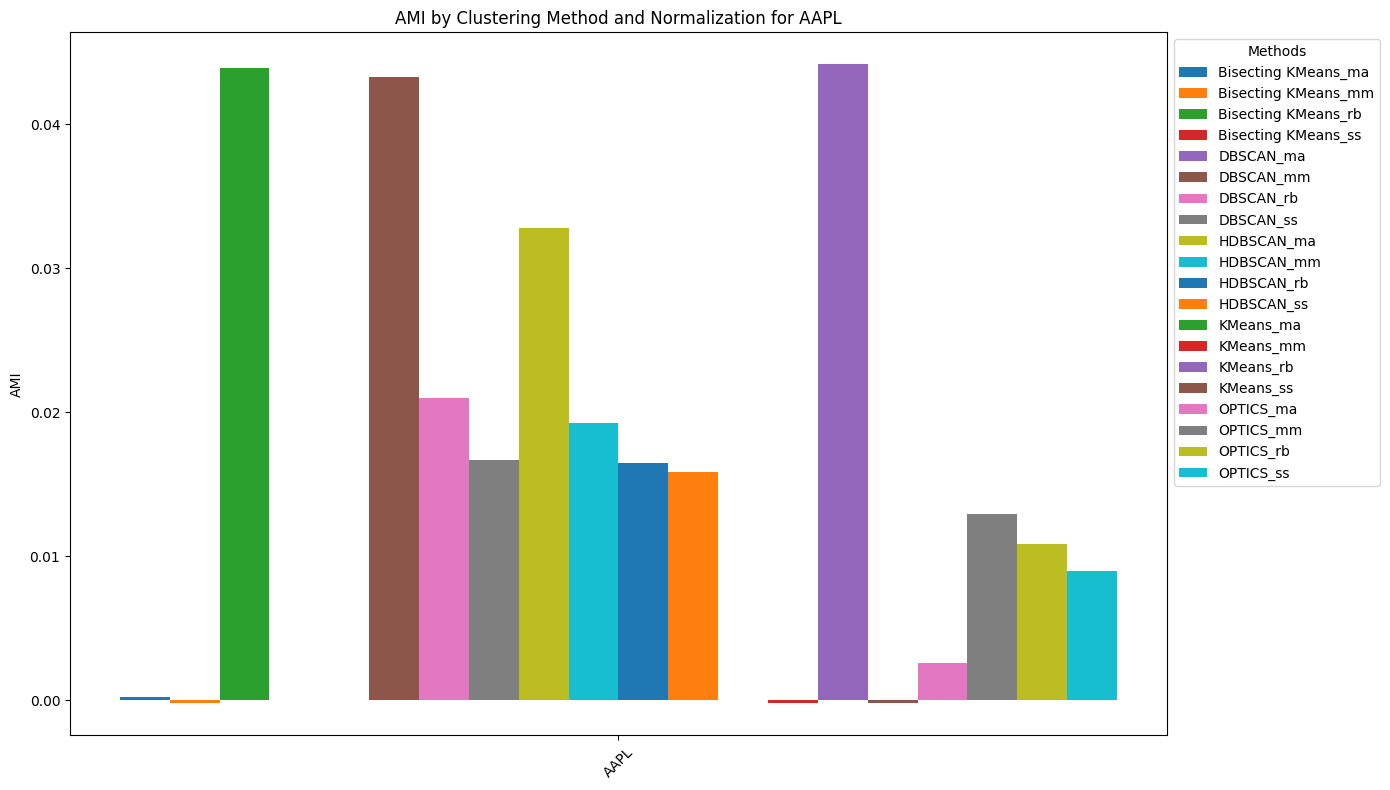

In [62]:
import matplotlib.pyplot as plt
import numpy as np

clustering_methods = set()
normalization_methods = set()
for dataset in data:
    for key in dataset.keys():
        method, norm = key.rsplit('_', 1)
        clustering_methods.add(method)
        normalization_methods.add(norm)

clustering_methods = sorted(list(clustering_methods))
normalization_methods = sorted(list(normalization_methods))

# Score types
score_types = ['Silhouette', 'V-measure', 'ARI', 'NMI', 'AMI']

# Create scores dictionary for each dataset and score type
scores_datasets = {
    dataset_name: {
        score_type: {(method, norm): [] for method in clustering_methods for norm in normalization_methods}
        for score_type in score_types
    } 
    for dataset_name in datasets
}

# Populate scores for each dataset and score type
for dataset_name, dataset in zip(datasets, data):
    for key, scores in dataset.items():
        method, norm = key.rsplit('_', 1)
        for score_type, score_value in zip(score_types, scores):
            scores_datasets[dataset_name][score_type][(method, norm)].append(score_value if score_value is not None else 0)

# Plotting
width = 0.8 / (len(clustering_methods) * len(normalization_methods))

for dataset_name in datasets:
    for score_type in score_types:
        fig, ax = plt.subplots(figsize=(14, 8))
        positions = np.arange(1)  # Only one dataset per plot
        scores = scores_datasets[dataset_name][score_type]

        for i, ((method, norm), score_values) in enumerate(scores.items()):
            offset = (i - (len(scores) / 2)) * width + (width / 2)
            ax.bar(positions + offset, score_values, width, label=f"{method}_{norm}")

        ax.set_ylabel(score_type)
        ax.set_title(f'{score_type} by Clustering Method and Normalization for {dataset_name}')
        ax.set_xticks(positions)
        ax.set_xticklabels([dataset_name])
        ax.legend()

        plt.xticks(rotation=45)
        plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Methods")
        plt.tight_layout()

        plt.show()